In [17]:
from ahh import vis, exp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [18]:
da = exp.arr_ds()['air'] # initialize data
da

<xarray.DataArray 'air' (time: 366, lat: 73, lon: 144)>
[3847392 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-01-02 1948-01-03 ...
Attributes:
    long_name:     mean Daily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    actual_range:  [ 188.29000854  315.29998779]
    valid_range:   [ 185.16000366  331.16000366]

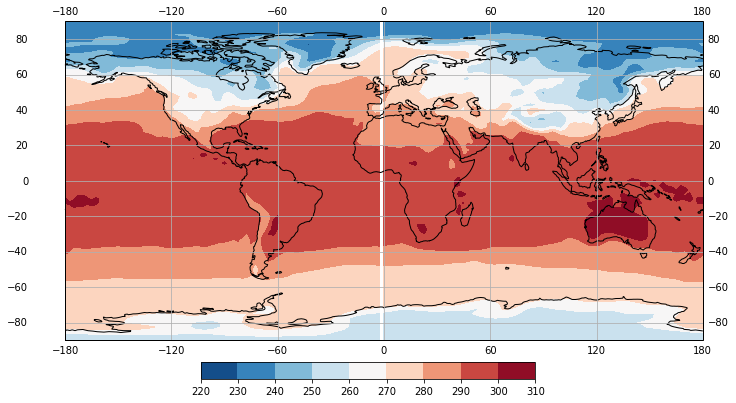

In [36]:
fig = plt.figure(figsize=(12, 8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
im = ax.contourf(da.lon, da.lat, da[0].values, transform=projection, cmap='RdBu_r')
_ = plt.colorbar(im, orientation='horizontal', shrink=0.5, pad=0.05)
_ = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
_ = ax.coastlines()
plt.grid() # somewhat similar to below, but requires more lines to clean up

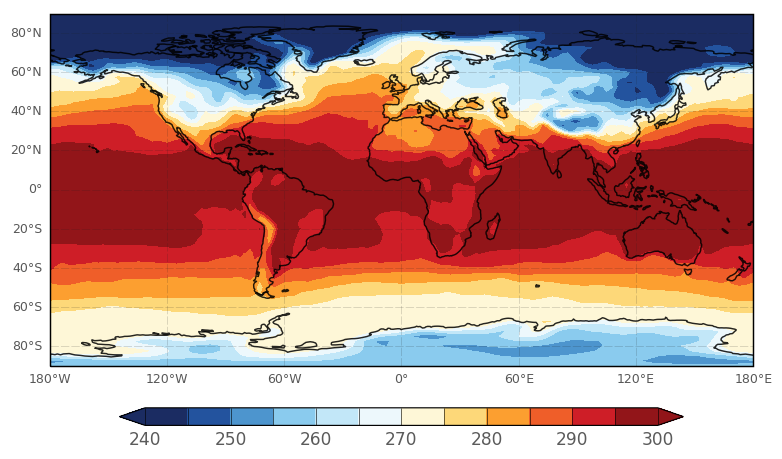

In [37]:
ax = vis.plot_map(da[0]) # if xr.DataArray, handles lat and lon automatically

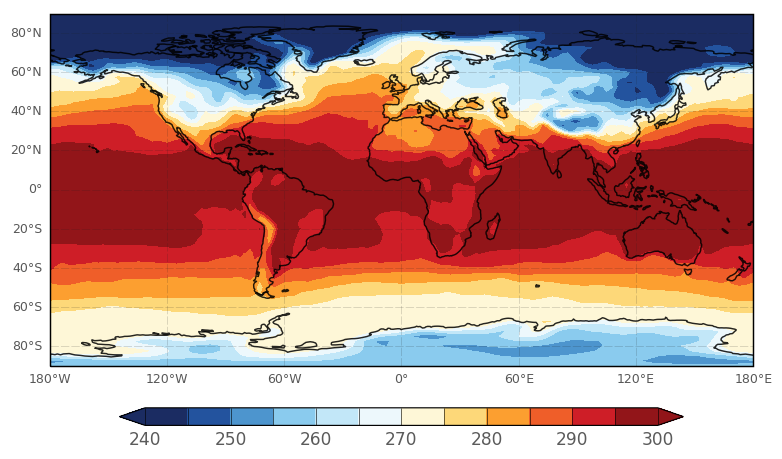

In [21]:
ax = vis.plot_map(da[0], da.lat, da.lon) # if not xr.DataArray, have to input data, lat, lon

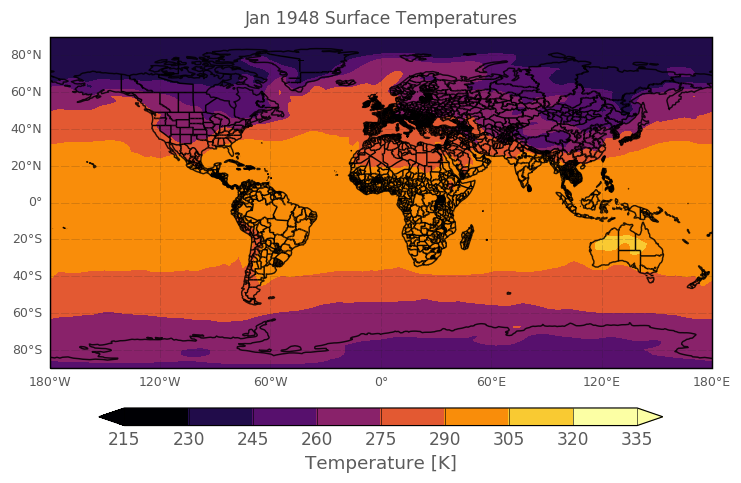

In [23]:
ax = vis.plot_map(da[0],
                  title='Jan 1948 Surface Temperatures',
                  latlim=(0, 90), lonlim=(0, -180), # set lat and lon limits
                  data_lim=(215, 335), interval=15, # adjust limits and intervals
                  cmap='inferno', cbar_label='Temperature [K]', # change color and label
                  states=True, countries=True) # add country and state borders

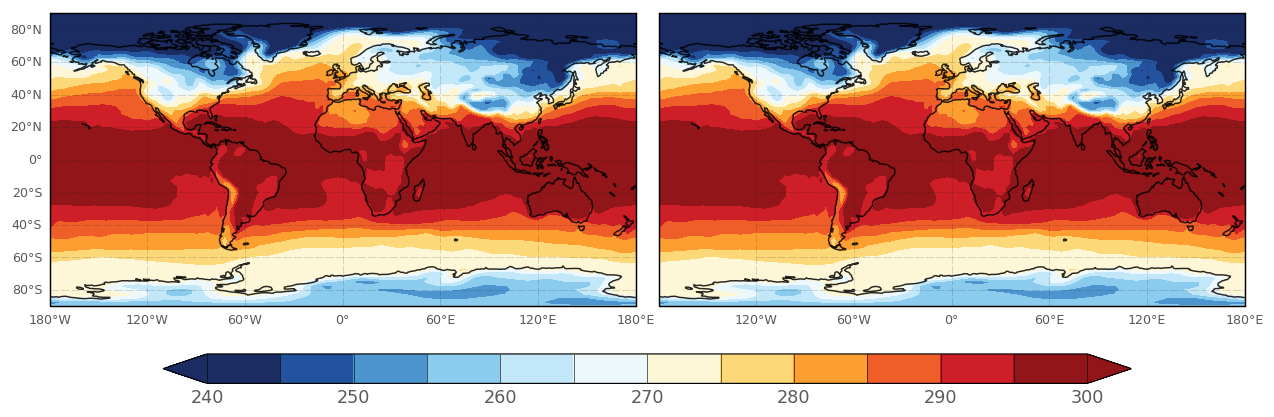

In [24]:
vis_dict = dict(wrap=True, cols=2, cbar=False) # common settings
ax = vis.plot_map(da[0].values, da.lat, da.lon, pos=1, **vis_dict) # left subplot
ax2, im = vis.plot_map(da[0], pos=2, returnplot=True, # right subplot
                       lat_labels=None,
                       lon_labels=range(-120, 210, 60), # declutter
                       **vis_dict)
vis.set_cbar(ax, im, fig=True) # unified color bar

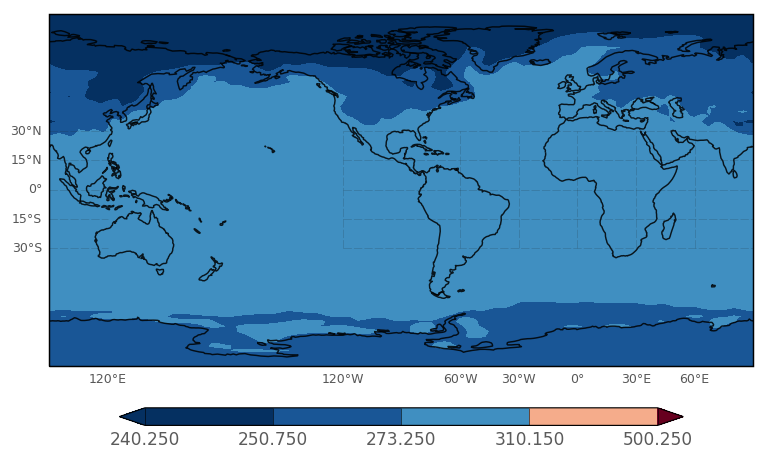

In [25]:
ax = vis.plot_map(da[0].values, da.lat, da.lon, wrap=True,
                  contourf=(240.25, 250.75, 273.25, 310.15, 500.25), # set your own contours
                  fmt='%.3f', # format of the color bar labels
                  cmap=vis.get_cmap('RdBu_r', n=100),
                  central_longitude=-90,
                  lat_labels=[-30, -15, 0, 15, 30],
                  lon_labels=[-120, -60, -30, 0, 30, 60, 120]) # set your own lat and lon labels

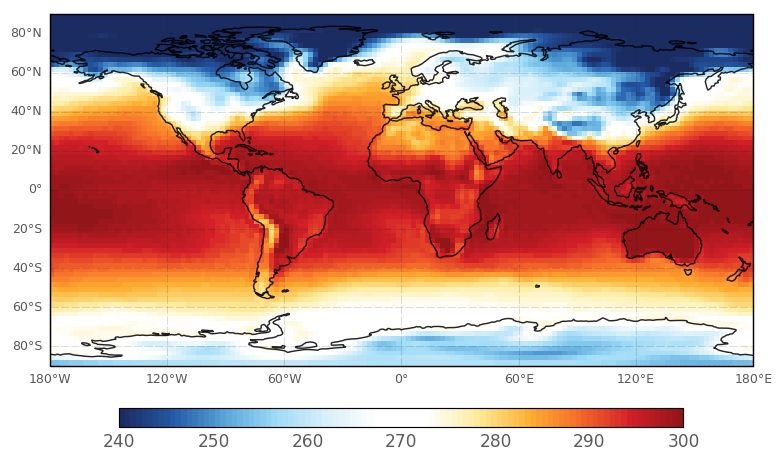

In [28]:
ax = vis.plot_map(da[0], contourf=False) # for smooth gradient

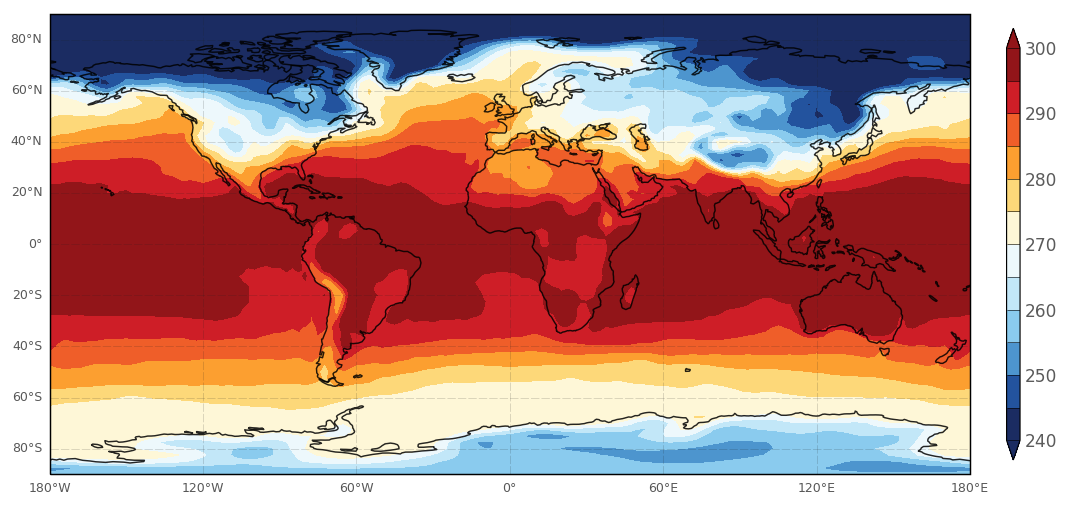

In [29]:
ax = vis.plot_map(da[0], orientation='vertical') # vertical color bar